# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" #all URLs created need to be in quotes.

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city.replace(' ', '+')}&appid={weather_api_key}" #f string delivers the final output injecting with city name, replacing potential spaces in city names for final URL output using concat characters
    #&appid={weather_api_key} references Open Weather's AppID / api key in my api_keys.py config file (vs. hard coding API key in code)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities    
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() #define the api call ("city_weather") using JSON fetch method ("get") for the "city_url" endpoint URLs we're creating.

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] #"coord" = key in dictionary, "lat" is value stored in key listing as outlined in OpenWeather documentation output example.
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]#value pulled from "main" key needs to follow exact same format as defined in doc example (i.e. max temp = "temp_max" in OW documentation example)
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qui nhon
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | swift current
Processing Record 4 of Set 1 | chui
Processing Record 5 of Set 1 | fort bragg
Processing Record 6 of Set 1 | ola
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | castillos
Processing Record 14 of Set 1 | dawson creek
Processing Record 15 of Set 1 | anar darah
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | aykhal
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | polyarnyy
Processing Record 21 of Set 1 | isla mujeres
Processing Record 22 of Set 1 | santeramo in colle
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          605
Lat           605
Lng           605
Max Temp      605
Humidity      605
Cloudiness    605
Wind Speed    605
Country       605
Date          605
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qui nhon,13.7667,109.2333,298.24,89,22,4.96,VN,1712093299
1,avarua,-21.2078,-159.7750,302.18,74,75,4.12,CK,1712093299
2,swift current,50.2834,-107.8014,287.60,38,0,6.17,CA,1712093098
3,chui,-33.6971,-53.4616,290.49,70,4,3.04,UY,1712093206
4,fort bragg,35.1390,-79.0060,303.82,49,20,5.66,US,1712093301


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qui nhon,13.7667,109.2333,298.24,89,22,4.96,VN,1712093299
1,avarua,-21.2078,-159.7750,302.18,74,75,4.12,CK,1712093299
2,swift current,50.2834,-107.8014,287.60,38,0,6.17,CA,1712093098
3,chui,-33.6971,-53.4616,290.49,70,4,3.04,UY,1712093206
4,fort bragg,35.1390,-79.0060,303.82,49,20,5.66,US,1712093301


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

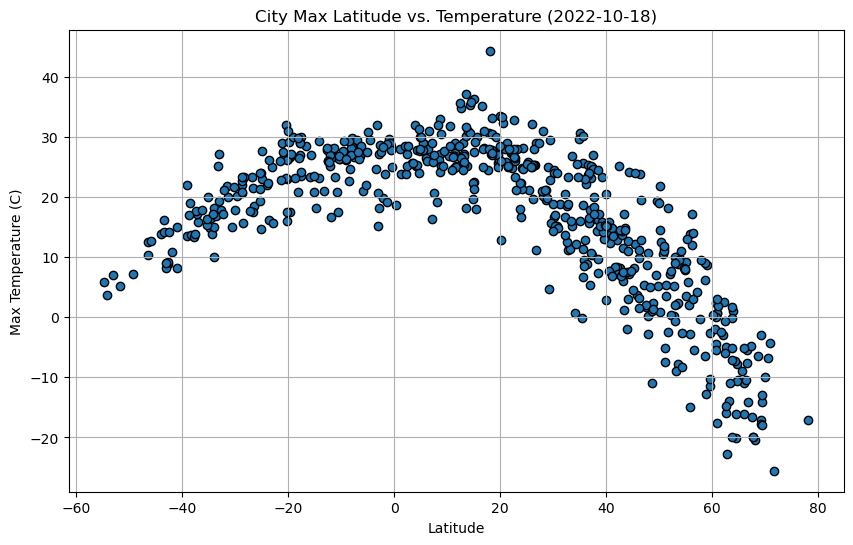

In [8]:
#Define data to be used for Lat vs. Temp scatter chart; remember to reactivate everything (including API pull) when making changes as Max Temp always goes out of whack otherwise.
weather_data = city_data_df[['Lat', 'Max Temp']]

#convert citipy Kelvin to Celsius (or Metric) measurement; use .loc to specify to Pandas that this is a view only from dataset (avoiding slice warning)
city_data_df.loc[:, 'Max Temp'] = city_data_df['Max Temp'] - 273.15

# Build scatter plot for latitude vs. temperature
weather_data = city_data_df[['Lat', 'Max Temp']] #use double brackets to specify exact columns from dataset that you want to use

# Incorporate the other graph properties
#lat_temp_df = weather_data.groupby('Lat', 'Max Temp').reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

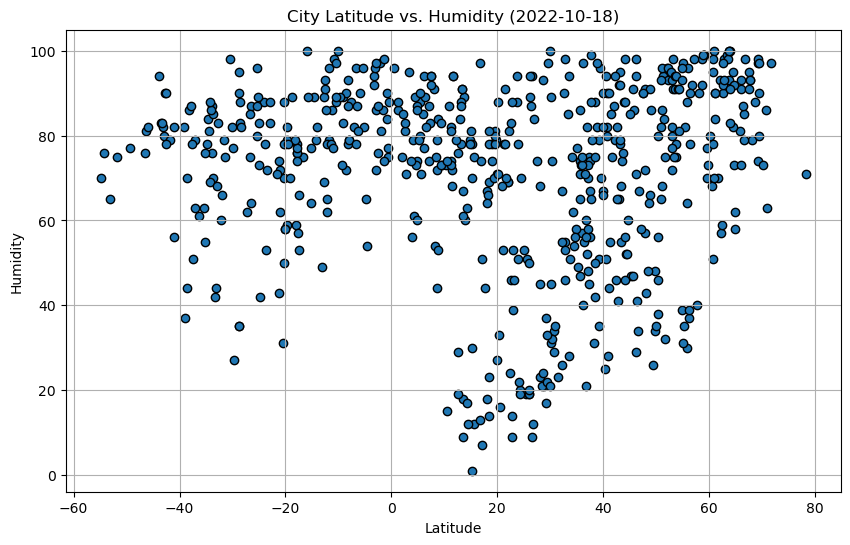

In [9]:
#Define data to be used for Lat vs. Humidity scatter chart
humidity_data = city_data_df[['Lat', 'Humidity']]

# Build scatter plot for latitude vs. temperature
humidity_data = city_data_df[['Lat', 'Humidity']] 

plt.figure(figsize=(10, 6))
plt.scatter(humidity_data['Lat'], humidity_data['Humidity'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

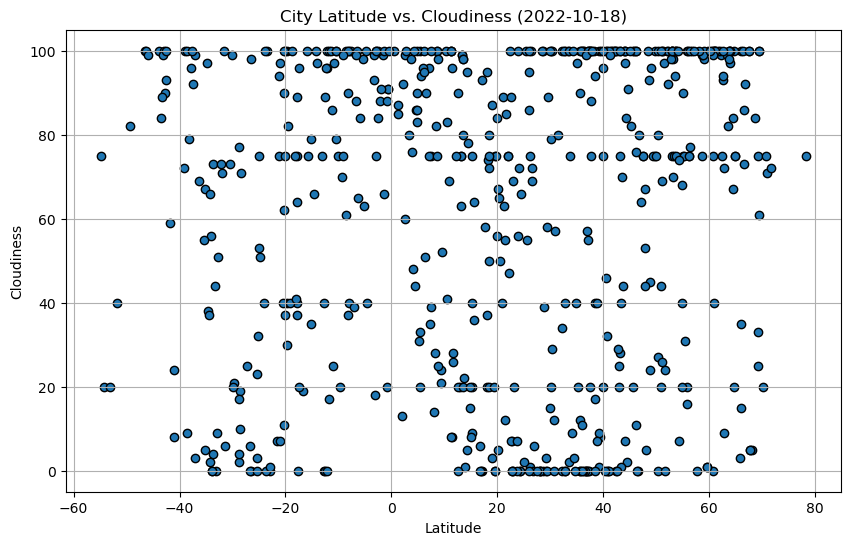

In [10]:
#Define data to be used for Lat vs. Cloudiness scatter chart
cloud_data = city_data_df[['Lat', 'Cloudiness']]

# Build scatter plot for latitude vs. cloudiness
cloud_data = city_data_df[['Lat', 'Cloudiness']] #use double brackets to specify exact columns from dataset that you want to use

plt.figure(figsize=(10, 6))
plt.scatter(cloud_data['Lat'], cloud_data['Cloudiness'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

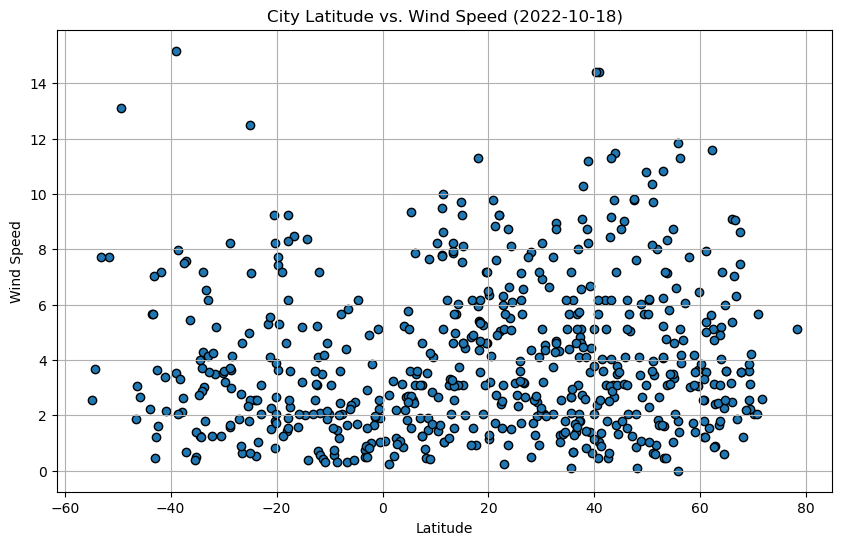

In [11]:
#Define data to be used for Lat vs. Temp scatter chart
wind_data = city_data_df[['Lat', 'Wind Speed']]

# Build scatter plot for latitude vs. temperature
wind_data = city_data_df[['Lat', 'Wind Speed']] #use double brackets to specify exact columns from dataset that you want to use

plt.figure(figsize=(10, 6))
plt.scatter(wind_data['Lat'], wind_data['Wind Speed'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#fit the linear regression model
(slope, intercept, r_value, _, _) = linregress(city_data_df['Lat'], city_data_df['Max Temp'])

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qui nhon,13.7667,109.2333,25.09,89,22,4.96,VN,1712093299
2,swift current,50.2834,-107.8014,14.45,38,0,6.17,CA,1712093098
4,fort bragg,35.1390,-79.0060,30.67,49,20,5.66,US,1712093301
5,ola,59.5833,151.2833,-11.39,77,1,3.65,RU,1712093301
6,whitehorse,60.7161,-135.0538,2.43,51,75,2.57,CA,1712093267


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,29.03,74,75,4.12,CK,1712093299
3,chui,-33.6971,-53.4616,17.34,70,4,3.04,UY,1712093206
9,puerto natales,-51.7236,-72.4875,5.25,75,40,7.72,CL,1712093303
11,hithadhoo,-0.6000,73.0833,28.42,75,91,2.55,MV,1712093304
12,castillos,-34.1667,-53.8333,16.82,69,2,2.88,UY,1712093304


###  Temperature vs. Latitude Linear Regression Plot

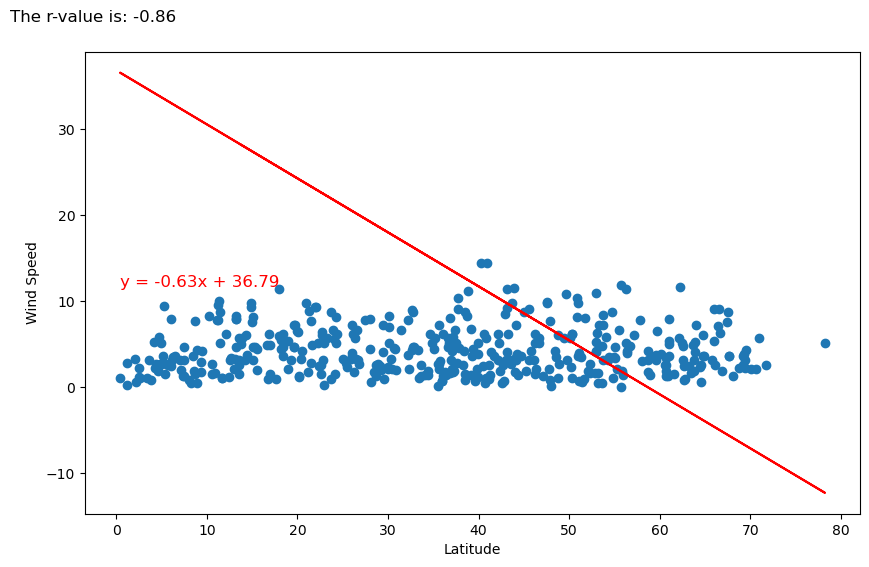

In [15]:
# Linear regression on Northern Hemisphere
#fit the linear regression model
(slope, intercept, r_value, _, _) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Create a range of temps for predictions
lat_range = northern_hemi_df['Lat']

# Calculate the corresponding temps using the linear model
predicted_temps = slope * lat_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], label='Actual Data')
plt.plot(northern_hemi_df['Lat'], predicted_temps, color='red', label='Regression Line')

#Annotate the plot with the regression equation in red in the middle
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#Determine positions for the texts
current_ylim = plt.ylim()
current_xlim = plt.xlim()
regression_eq_text_y_position = (current_ylim[1] + current_ylim[0]) / 2  # For regression equation, in the middle

#Display regression equation in the middle of the chart
plt.text(x=min(northern_hemi_df['Lat']), 
         y=regression_eq_text_y_position, 
         s=regression_eq,
         fontsize=12,
         color='red',
         verticalalignment='center')

#Define the r-value statement
r_value_statement = f"The r-value is: {r_value:.2f}"

#Place the "r-value statement" outside of the plotted area
#Using figure coordinates (0,0 is bottom left and 1,1 is top right)
plt.text(0.05, 0.95,  #x, y in figure coordinates
         s=r_value_statement,
         fontsize=12,
         color='black',
         transform=plt.gcf().transFigure,  #This makes the positioning relative to the figure
         verticalalignment='top')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()


Discussion about the linear relationship for the Northern Hemisphere: This regression analysis indicates a negative correlation between Latitude (x axis) and Temperature (y axis). Negative in the sense that for every 1 degree latitude increase north of the equator (Lat=0) the temperature falls by 0.63 degrees Celsius. An intuitive (and fairly strong statistical) confirmation that in fact, temperatures do cool away from the equator the further north you go. Digging into the regression analysis results a bit more closely indicates that: 1) "-0.63x" references the slope of the regression, as a negative correlation being closer to -1 (at 0.63) confirms that there is a fairly strong likelihood in predicting that for every +1 difference in latitude moving north away from the equator, the likelihood increases that the temperature will drop by 0.63 degrees Celsius; 2) "36.79" references the regression intercept position setting 36.79 degrees as the baseline equatorial temperature for predictive analysis - for every 1 unit shift in Latitude north away from the equator we should expect the temperature to drop by 1 degree Celsius. Data and model caveats apply here as the baseline temperature (of 38.13) degrees is dependent solely on a wide array of factors within the data pulled from the OpenWeather API at a moment in time. A more robust model would incorporate multiple weather and position data (among other data sources) to potentially provide a more accurate baseline for analysis.

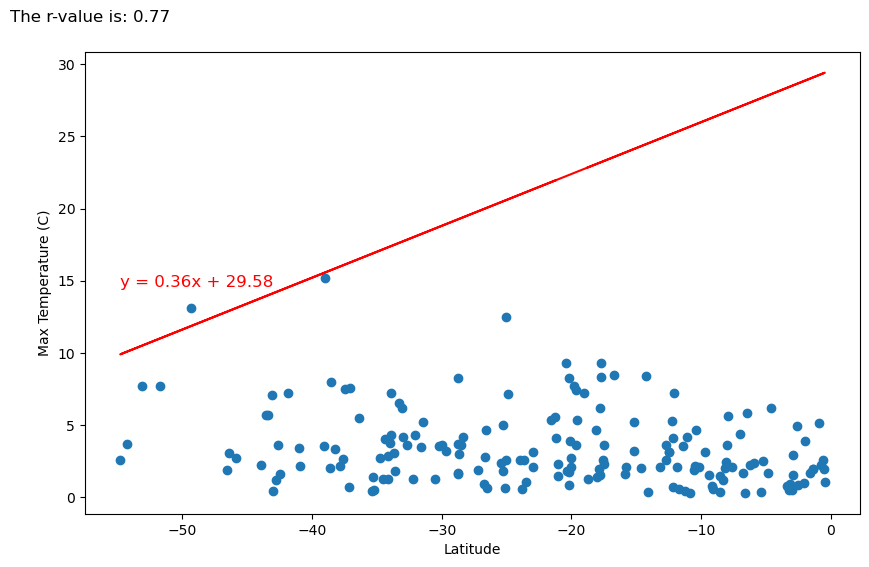

In [16]:
# Linear regression on Southern Hemisphere
#fit the linear regression model
(slope, intercept, r_value, _, _) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Create a range of temps for predictions
lat_range = southern_hemi_df['Lat']

# Calculate the corresponding temps using the linear model
predicted_temps = slope * lat_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], label='Actual Data')
plt.plot(southern_hemi_df['Lat'], predicted_temps, color='red', label='Regression Line')

#Annotate the plot with the regression equation
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#Determine positions for the texts
current_ylim = plt.ylim()
current_xlim = plt.xlim()
regression_eq_text_y_position = (current_ylim[1] + current_ylim[0]) / 2  #For regression equation, in the middle

#Display regression equation in the middle of the chart
plt.text(x=min(southern_hemi_df['Lat']), 
         y=regression_eq_text_y_position, 
         s=regression_eq,
         fontsize=12,
         color='red',
         verticalalignment='center')

#Define the r-value statement
r_value_statement = f"The r-value is: {r_value:.2f}"

#Place the "r-value statement" outside of the plotted area
#Using figure coordinates (0,0 is bottom left and 1,1 is top right)
plt.text(0.05, 0.95,  #x, y in figure coordinates
         s=r_value_statement,
         fontsize=12,
         color='black',
         transform=plt.gcf().transFigure,  #This makes the positioning relative to the figure
         verticalalignment='top')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

plt.show()

**Discussion about the linear relationship for the Southern Hempisphere:** Performing a similar regression analysis to the Northern Hemisphere above provides a different result, possibly due to many factors beyond the data provided (i.e. geographic differences between the hemispheres, sea currents and other influencing factors not explicitly captured in the provided data). The regression result was y = 0.36x + 29.58 indicating that this analysis predicts a temp of 29.58 at the equator (i.e. the baseline equatorial temperature for this analysis) and predicts an increase of 0.36 degrees Celsius in temp for each 1 degree drop in Latitude away from the equator. Temperatures are predicted to get warmer the further south one moves from the equator in this analysis. As noted above, many factors play into a final analysis and these results should be taken as one of potentially many data points to determine a final statistical predictive relationship between Latitude and Longitude for each Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

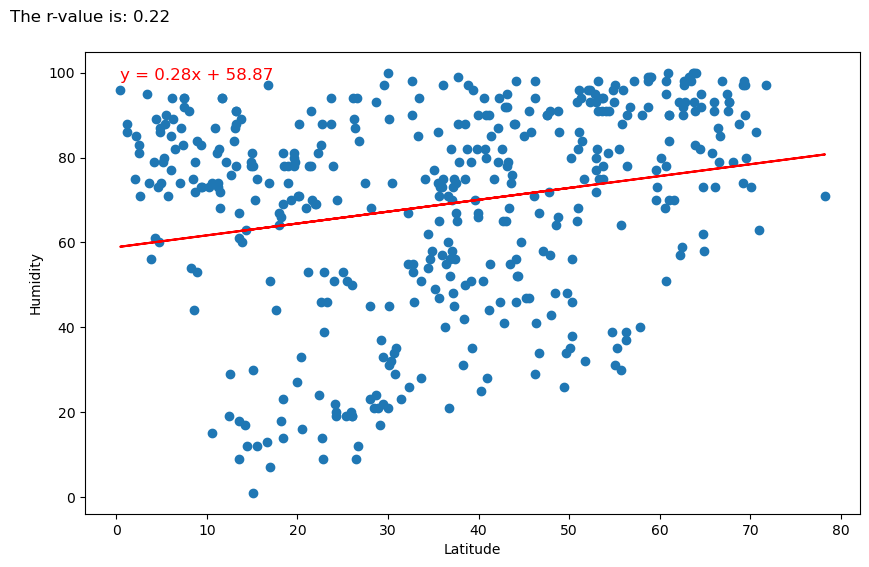

In [17]:
# Linear regression on Nothern Hemisphere humidity vs. latitude
(slope, intercept, r_value, _, _) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Create a range of humidity for predictions
hum_range = northern_hemi_df['Lat']

# Calculate the corresponding humidity figures using the linear model
predicted_hum = slope * hum_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], label='Actual Data')
plt.plot(northern_hemi_df['Lat'], predicted_hum, color='red', label='Regression Line')

#Annotate the plot with the regression equation
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#Determine positions for the texts
current_ylim = plt.ylim()
current_xlim = plt.xlim()
#regression_eq_text_y_position = (current_ylim[1] + current_ylim[0]) / 2  #For regression equation, in the middle
regression_eq_text_y_position = current_ylim[1] - (current_ylim[1] - current_ylim[0]) * 0.05

#Display regression equation in red in the middle
plt.text(x=min(northern_hemi_df['Lat']), 
         y=regression_eq_text_y_position, 
         s=regression_eq,
         fontsize=12,
         color='red',  # Set text color to red for the regression equation
         verticalalignment='center')

#Define the r-value statement
r_value_statement = f"The r-value is: {r_value:.2f}"

#Place the "r-value statement" outside of the plotted area
#Using figure coordinates (0,0 is bottom left and 1,1 is top right)
plt.text(0.05, 0.95,  #x, y in figure coordinates
         s=r_value_statement,
         fontsize=12,
         color='black',
         transform=plt.gcf().transFigure,  #This makes the positioning relative to the figure
         verticalalignment='top')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

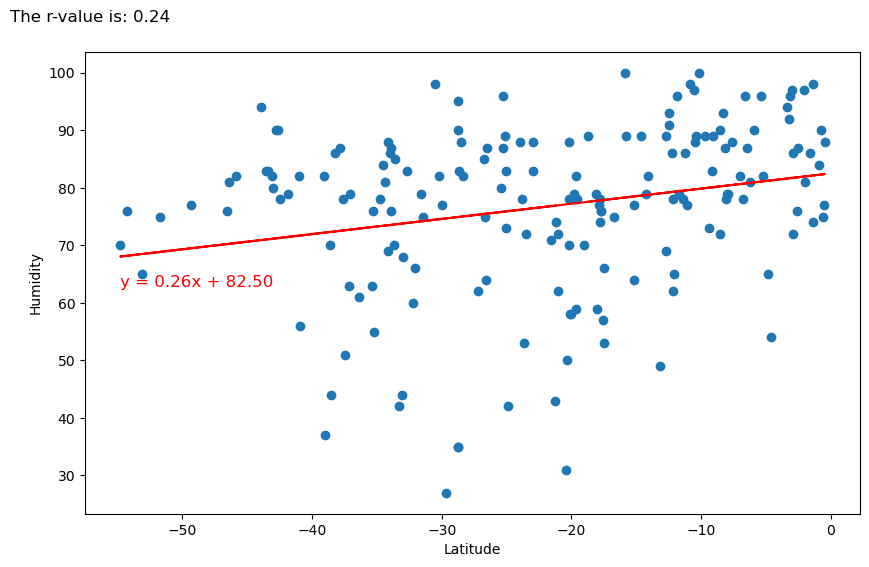

In [18]:
# Linear regression on Southern Hemisphere humidity vs. latitude
(slope, intercept, r_value, _, _) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Create a range of humidity for predictions
hum_range = southern_hemi_df['Lat']

# Calculate the corresponding humidity figures using the linear model
predicted_hum = slope * hum_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], label='Actual Data')
plt.plot(southern_hemi_df['Lat'], predicted_hum, color='red', label='Regression Line')

#Annotate the plot with the regression equation
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#Determine positions for the texts
current_ylim = plt.ylim()
current_xlim = plt.xlim()
regression_eq_text_y_position = (current_ylim[1] + current_ylim[0]) / 2  #For regression equation, in the middle

#Display regression equation in red in the middle
plt.text(x=min(southern_hemi_df['Lat']), 
         y=regression_eq_text_y_position, 
         s=regression_eq,
         fontsize=12,
         color='red',  # Set text color to red for the regression equation
         verticalalignment='center')

#Define the r-value statement
r_value_statement = f"The r-value is: {r_value:.2f}"

#Place the "r-value statement" outside of the plotted area
#Using figure coordinates (0,0 is bottom left and 1,1 is top right)
plt.text(0.05, 0.95,  #x, y in figure coordinates
         s=r_value_statement,
         fontsize=12,
         color='black',
         transform=plt.gcf().transFigure,  #This makes the positioning relative to the figure
         verticalalignment='top')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

**Discussion about the linear relationship between Humidity and Longitude in the Northern or Southern Hemisphere:** This analysis predicts that there is a positive and moderate predictive expectation that humidity increases moving away from the equator in both the Northern and Southern Hemisphere. Northern hemisphere: Regression analysis results (y = 0.28x + 58.87) indicate that for every 1 unit increase in latitude north from the equator we should expect humidity to increase by 0.28 units. This analysis predicts the baseline humidity result at the equator is 58.87 units; Southern hemisphere: Analysis results (y = 0.26 + 82.50) predicts that for every 1 unit decrease in latitude moving south away from the equator, humidity should increase by 0.26 units, the baseline equatorial humidity being calculated at 82.80%. As noted previously, these results stem solely from data provided by OpenWeather API and may take into account variances in hemispherical land masses, ocean currents and other factors not otherwise stated explicitly in the data and so should be taken as preliminary analysis results.

### Cloudiness vs. Latitude Linear Regression Plot

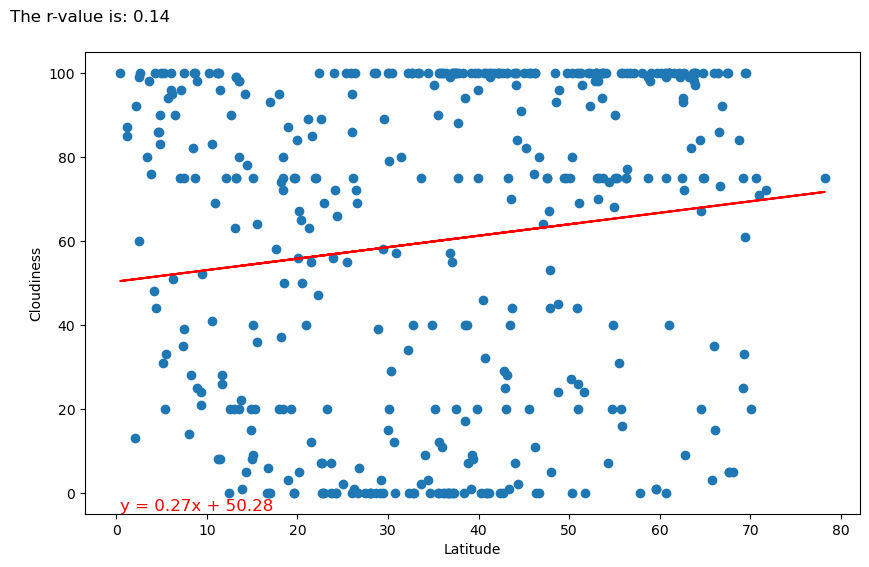

In [19]:
# Linear regression on Nothern Hemisphere cloudiness vs. latitude
(slope, intercept, r_value, _, _) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Create a range of cloudiness for predictions
cloud_range = northern_hemi_df['Lat']

# Calculate the corresponding cloud cover using the linear model
predicted_cloud = slope * cloud_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], label='Actual Data')
plt.plot(northern_hemi_df['Lat'], predicted_cloud, color='red', label='Regression Line')

#Annotate the plot with the regression equation
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#Determine positions for the texts
current_ylim = plt.ylim()
current_xlim = plt.xlim()
regression_eq_text_y_position = (current_ylim[0] + current_ylim[0]) / 2 #For regression equation, in the middle

#Display regression equation in red in the middle
plt.text(x=min(northern_hemi_df['Lat']), 
         y=regression_eq_text_y_position, 
         s=regression_eq,
         fontsize=12,
         color='red',  # Set text color to red for the regression equation
         verticalalignment='bottom')

#Define the r-value statement
r_value_statement = f"The r-value is: {r_value:.2f}"

#Place the "r-value statement" outside of the plotted area
#Using figure coordinates (0,0 is bottom left and 1,1 is top right)
plt.text(0.05, 0.95,  #x, y in figure coordinates
         s=r_value_statement,
         fontsize=12,
         color='black',
         transform=plt.gcf().transFigure,  #This makes the positioning relative to the figure
         verticalalignment='top')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

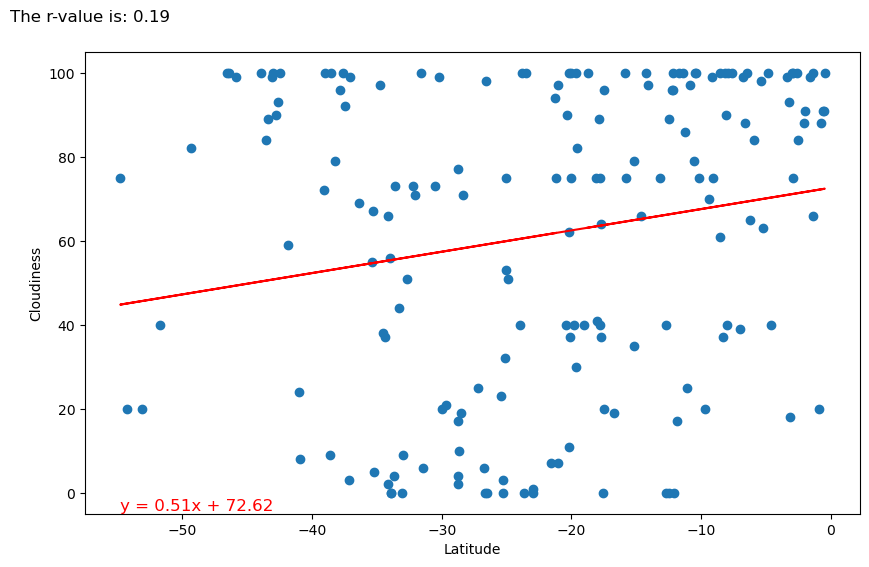

In [20]:
#Linear regression on Southern Hemisphere cloud cover vs. latitude
(slope, intercept, r_value, _, _) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Create a range of cloudiness for predictions
cloud_range = southern_hemi_df['Lat']

#Calculate the corresponding temps using the linear model
predicted_hum = slope * cloud_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], label='Actual Data')
plt.plot(southern_hemi_df['Lat'], predicted_hum, color='red', label='Regression Line')

#Annotate the plot with the regression equation
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#Define the r-value statement
r_value_statement = f"The r-value is: {r_value:.2f}"

#Determine positions for the texts
current_ylim = plt.ylim()
current_xlim = plt.xlim()
regression_eq_text_y_position = (current_ylim[0] + current_ylim[0]) / 2  #For regression equation, in the middle

#Display regression equation in red in the middle
plt.text(x=min(southern_hemi_df['Lat']), 
         y=regression_eq_text_y_position, 
         s=regression_eq,
         fontsize=12,
         color='red',  # Set text color to red for the regression equation
         verticalalignment='bottom')

#Place the "r-value statement" outside of the plotted area
#Using figure coordinates (0,0 is bottom left and 1,1 is top right)
plt.text(0.05, 0.95,  #x, y in figure coordinates
         s=r_value_statement,
         fontsize=12,
         color='black',
         transform=plt.gcf().transFigure,  #This makes the positioning relative to the figure
         verticalalignment='top')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

**Discussion about the linear relationship between Cloudiness and Latitude in the Northern and Southern Hemispheres:** This analysis predicts that there is a positive and moderate predictive expectation that cloudiness increases moving away from the equator in the Northern hemisphere. The relationship in the Southern hemisphere is very weak and most likely statistical noise. Northern hemisphere: Regression analysis results (y = 0.27x + 50.28) indicate that for every 1 unit increase in latitude north from the equator we should expect cloudiness to increase by 0.28 units. This analysis predicts the baseline cloudiness level at the equator as 50.28 units; Southern hemisphere: Analysis results (y = 0.51 + 72.62) predicts that for every 1 unit decrease in latitude moving south away from the equator, cloudiness should increase by 0.51 units, the baseline equatorial cloudiness being calculated at 72.62 units. As noted previously, these results stem solely from data provided by OpenWeather API and may take into account variances in hemispherical land masses, ocean currents and other factors not otherwise stated explicitly in the data and so should be taken as preliminary analysis results only.

### Wind Speed vs. Latitude Linear Regression Plot

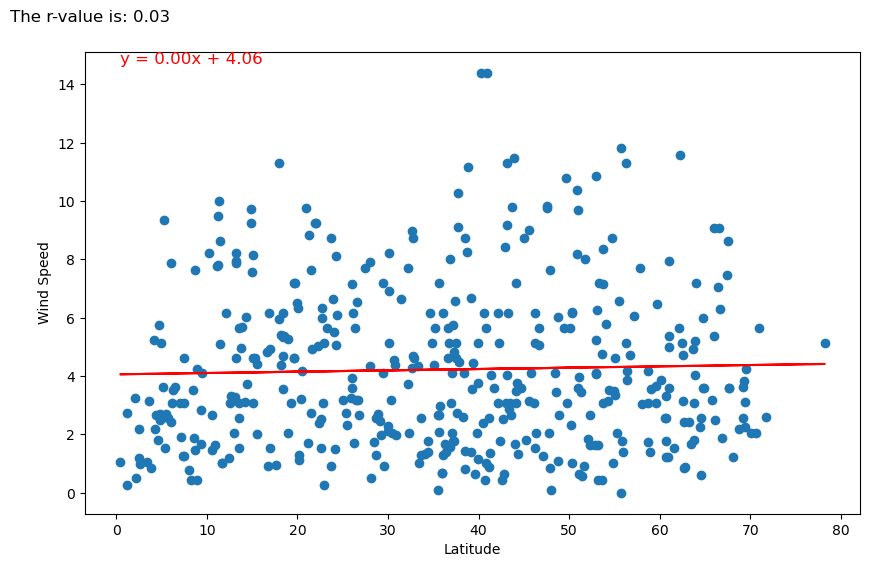

In [21]:
# Linear regression on Nothern Hemisphere wind speed vs. latitude
(slope, intercept, r_value, _, _) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Create a range of cloudiness for predictions
wind_range = northern_hemi_df['Lat']

#Calculate the corresponding cloud cover using the linear model
predicted_wind = slope * wind_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], label='Actual Data')
plt.plot(northern_hemi_df['Lat'], predicted_wind, color='red', label='Regression Line')

#Annotate the plot with the regression equation
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#Determine positions for the texts
current_ylim = plt.ylim()
current_xlim = plt.xlim()
regression_eq_text_y_position = (current_ylim[1] + current_ylim[1]) / 2  #For regression equation, in the middle

#Display regression equation in red in the middle
plt.text(x=min(northern_hemi_df['Lat']), 
         y=regression_eq_text_y_position, 
         s=regression_eq,
         fontsize=12,
         color='red',  # Set text color to red for the regression equation
         verticalalignment='top')

#Define the r-value statement
r_value_statement = f"The r-value is: {r_value:.2f}"

#Place the "r-value statement" outside of the plotted area
#Using figure coordinates (0,0 is bottom left and 1,1 is top right)
plt.text(0.05, 0.95,  #x, y in figure coordinates
         s=r_value_statement,
         fontsize=12,
         color='black',
         transform=plt.gcf().transFigure,  #This makes the positioning relative to the figure
         verticalalignment='top')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

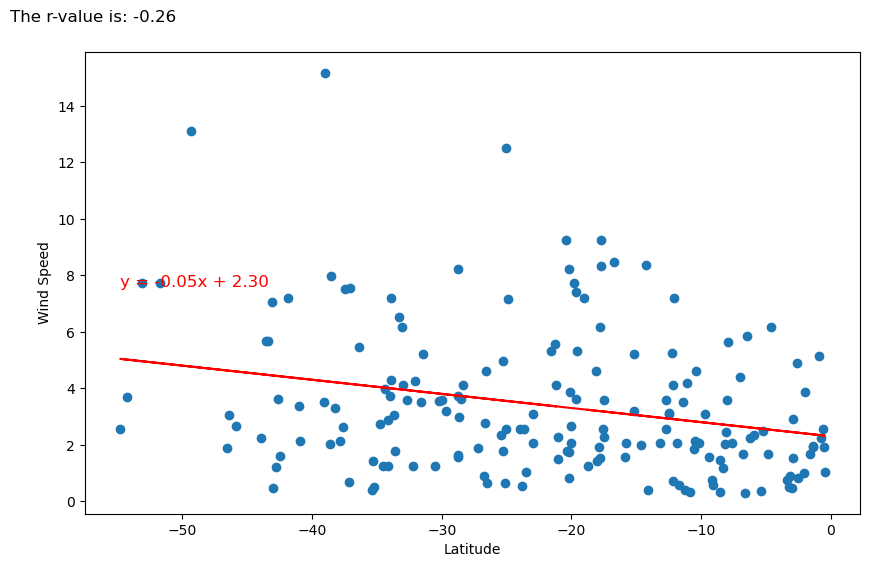

In [22]:
#Your linear regression calculation
(slope, intercept, r_value, _, _) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Create a range of cloudiness for predictions
wind_range = southern_hemi_df['Lat']

#Calculate the predicted wind speeds
predicted_wind = slope * wind_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], label='Actual Data')
plt.plot(southern_hemi_df['Lat'], predicted_wind, color='red', label='Regression Line')

#Annotate the plot with the regression equation in red
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#Determine positions for the texts
current_ylim = plt.ylim()
current_xlim = plt.xlim()
regression_eq_text_y_position = (current_ylim[1] + current_ylim[0]) / 2  #For regression equation, in the middle

#Display regression equation in red in the middle
plt.text(x=min(southern_hemi_df['Lat']), 
         y=regression_eq_text_y_position, 
         s=regression_eq,
         fontsize=12,
         color='red',  # Set text color to red for the regression equation
         verticalalignment='center')

#Define the r-value statement
r_value_statement = f"The r-value is: {r_value:.2f}"

#Place the "r-value statement" outside of the plotted area
#Using figure coordinates (0,0 is bottom left and 1,1 is top right)
plt.text(0.05, 0.95,  #x, y in figure coordinates
         s=r_value_statement,
         fontsize=12,
         color='black',
         transform=plt.gcf().transFigure,  #This makes the positioning relative to the figure
         verticalalignment='top')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()



**Discussion about the linear relationship:** **Discussion about the linear relationship between Wind Speed and Latitude in the Northern and Southern Hemispheres:** This analysis predicts that there is a neutral predictive expectation that wind speed decrease moving away from the equator in the Northern hemisphere. The relationship in the Southern hemisphere is very weak as well, indicating a slightly negative relationship between wind speed and latitude. Northern hemisphere: Regression analysis results (y = 0.00x + 4.06) indicate that for every 1 unit increase in latitude north from the equator we should expect wind speed to decrease by 0.00 units. This analysis predicts the baseline wind speed level at the equator as 4.06 units; Southern hemisphere: Analysis results (y = -0.05 + 2.30) predicts that for every 1 unit decrease in latitude moving south away from the equator, wind speed should decrease by 0.06 units, the baseline equatorial wind speed being calculated at 2.74 units. As noted previously, these results stem solely from data provided by OpenWeather API and may take into account variances in hemispherical land masses, ocean currents and other factors not otherwise stated explicitly in the data and so should be taken as preliminary analysis results only.